In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import minimize


In [3]:
# create a normal vector with mean 10 and variance 4
x = np.random.normal(4, 2, 100 )
len(x)

100

In [4]:
#define the likelihood function:
def log_likelihood(p,x):
    x_bar = p[0]
    sigma_hat = p[1]
    l = -0.5*len(x)*np.log(2*np.pi) - 0.5*len(x)*np.log(sigma_hat**2) - np.sum(((x-x_bar)**2)/(2*sigma_hat**2))
    return -l
#The reason that the negative likelihood is used, is because the optimization function is a minimization one!

In [5]:
p0 = [3,1] #by passing the value of the parameters we can get the data likelihood
log_lik = log_likelihood(p0, x)
log_lik

306.63837432234357

In [6]:
np.sum(np.log(norm.pdf(x, loc= 3, scale = 1))) # One can use built-in function norm to calculate the density of the vector.

-306.6383743223436

In [7]:
minimize(log_likelihood, p0, args= (x,)) #line 5 gives the estimated parameters

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 200.1369147373386
        x: [ 4.044e+00  1.790e+00]
      nit: 11
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 3.135e-02  2.278e-04]
            [ 2.278e-04  1.586e-02]]
     nfev: 42
     njev: 14

Text(0.5, 1.0, 'Advertising series')

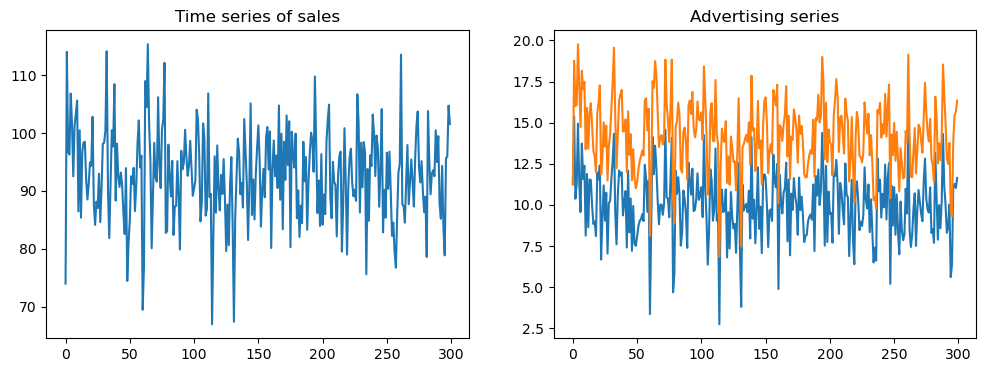

In [8]:
#Data generation process: Ad-stock model 
a0 = 50
a1 = 3
sigma = 4
gamma = 0.3
x = 10 + np.random.normal(0,2,300)
x_star = np.zeros(len(x))
x_star[0] = x[0]
for i in range(len(x)-1):
    x_star[i+1] = x[i+1] + gamma*x_star[i] 

y = np.zeros(len(x))
for i in range(len(x)):
    y[i] =  a0 + a1*x_star[i] + np.random.normal(0,sigma) 


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(np.arange(len(x)), y, label='Sales')
axs[0].set_title('Time series of sales')
axs[1].plot(np.arange(len(x)), x, x_star, label='Advertising level and Ad stock')
axs[1].set_title('Advertising series')

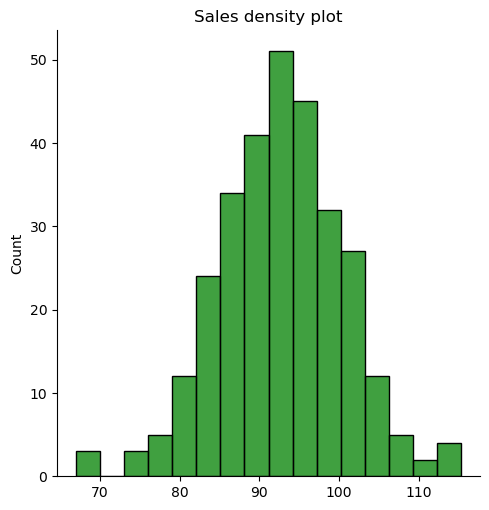

In [15]:
# the vector y is normally distributed:
plt.figure
sns.displot(y,color= 'g')
plt.title('Sales density plot')
plt.show()

In [10]:
#Estimating the coefficients and the carry-over parameter:
#The likelihood function:
def log_likelihood(p,x,y):
    a0_hat = p[0]
    a1_hat = p[1]
    sigma_hat = p[2]
    gamma_hat = p[3]
    A_star = np.zeros(len(x))
    A_star[0] = x[0]
    for i in range(len(x)-1):
        A_star[i+1] = x[i+1] + gamma_hat*A_star[i]

    l = -0.5*len(x)*np.log(2*np.pi) - 0.5*len(x)*np.log(sigma_hat**2) - np.sum(((y-a0_hat - a1_hat*A_star)**2)/(2*sigma_hat**2))
    return -l


In [11]:
p0 = [4,1,1,0.4]
ll = log_likelihood(p0,x,y)
ll

785282.7430217607

In [12]:
minimize(log_likelihood, p0, args= (x,y) )

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 847.9860385218519
        x: [ 4.990e+01  3.182e+00  4.086e+00  2.579e-01]
      nit: 80
      jac: [-7.629e-06 -9.155e-05 -3.815e-05 -5.798e-04]
 hess_inv: [[ 4.435e-02  4.386e-04 -3.499e-02 -9.063e-04]
            [ 4.386e-04  9.263e-03 -8.923e-04 -2.159e-03]
            [-3.499e-02 -8.923e-04  3.555e-02  8.556e-04]
            [-9.063e-04 -2.159e-03  8.556e-04  5.354e-04]]
     nfev: 490
     njev: 98